In [78]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
from csv import reader

In [79]:
df=pd.read_csv('groceries.csv')
df

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,17,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,1,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,10,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,4,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 33 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Item(s)  9835 non-null   int64 
 1   Item 1   9835 non-null   object
 2   Item 2   7676 non-null   object
 3   Item 3   6033 non-null   object
 4   Item 4   4734 non-null   object
 5   Item 5   3729 non-null   object
 6   Item 6   2874 non-null   object
 7   Item 7   2229 non-null   object
 8   Item 8   1684 non-null   object
 9   Item 9   1246 non-null   object
 10  Item 10  896 non-null    object
 11  Item 11  650 non-null    object
 12  Item 12  468 non-null    object
 13  Item 13  351 non-null    object
 14  Item 14  273 non-null    object
 15  Item 15  196 non-null    object
 16  Item 16  141 non-null    object
 17  Item 17  95 non-null     object
 18  Item 18  66 non-null     object
 19  Item 19  52 non-null     object
 20  Item 20  38 non-null     object
 21  Item 21  29 non-null     object
 22  

In [81]:
item_freq_subset = df.loc[:, df.columns != 'Item(s)']
item_freq_subset
#create temporary subset without items column
#to use for counting each item

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
from collections import Counter
item_freq = Counter() #empty counter object to store frequency of each item

for column in item_freq_subset.columns:
    column_values = item_freq_subset[column].dropna().tolist() #for each column, drop null values and convert to list
    item_freq.update(column_values)

item_freq = pd.Series(item_freq).sort_values(ascending=False) #convert object to series, sort in desc order
top20 = item_freq.head(20) #extract first 20 values
top20

whole milk               2513
other vegetables         1903
rolls/buns               1809
soda                     1715
yogurt                   1372
bottled water            1087
root vegetables          1072
tropical fruit           1032
shopping bags             969
sausage                   924
pastry                    875
citrus fruit              814
bottled beer              792
newspapers                785
canned beer               764
pip fruit                 744
fruit/vegetable juice     711
whipped/sour cream        705
brown bread               638
domestic eggs             624
dtype: int64

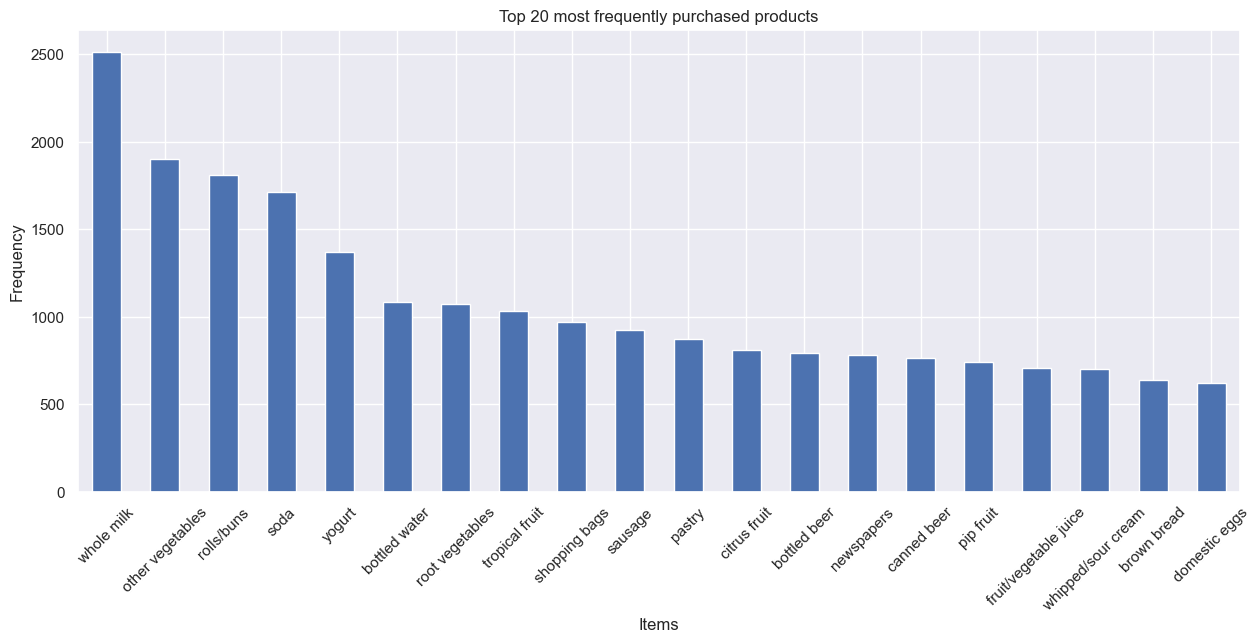

In [83]:
plt.figure(figsize=(15, 6))

top20.plot.bar()
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.title('Top 20 most frequently purchased products')
plt.xticks(rotation=45)
plt.show()

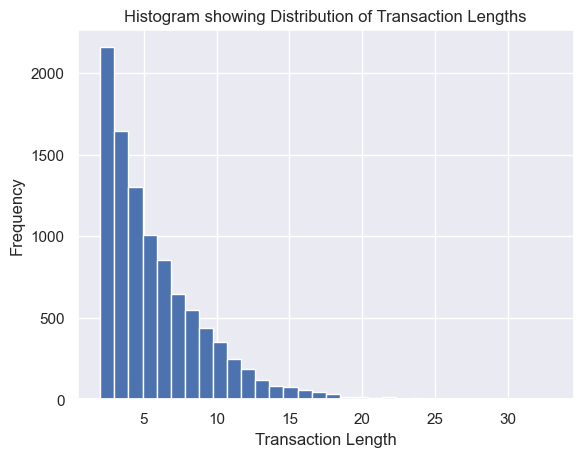

In [84]:
transaction_sizes = df.notnull().sum(axis=1) #sum each row's number of non-null values

plt.hist(transaction_sizes, bins=32) #32 bins as 32 columns 

plt.xlabel('Transaction Length')
plt.ylabel('Frequency')
plt.title('Histogram showing Distribution of Transaction Lengths')

plt.show()

In [85]:
#quite hard to read but there are non-zero values for transactions of length >18

In [86]:
transactions=[]

for index, row in df.drop(["Item(s)"], axis=1).iterrows(): #drop item(s) column as not needed, and iterate through every row
    transactions.append([item for item in row if pd.notna(item)]) #if item is non-null then add to list
    
transactions[0]

['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups']

In [87]:
df=pd.DataFrame(transactions)
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,tropical fruit,yogurt,coffee,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,whole milk,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,pip fruit,yogurt,cream cheese,meat spreads,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,other vegetables,whole milk,condensed milk,long life bakery product,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,None,None,None,None,None,None,None,None,None,None
9831,cooking chocolate,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,None,None,None,None,None,None,None,None,None,None
9833,semi-finished bread,bottled water,soda,bottled beer,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [88]:
#dataset now in a format required to be transaction encoded

In [89]:
from mlxtend.preprocessing.transactionencoder import TransactionEncoder

te = TransactionEncoder()
te_data=te.fit(transactions).transform(transactions)
df=pd.DataFrame(te_data, columns = te.columns_)

In [90]:
frequent_items = apriori(df, min_support = 0.03,use_colnames = True)
frequent_items

,support,itemsets
0,0.033452,(UHT-milk)
1,0.052466,(beef)
2,0.033249,(berries)
3,0.080529,(bottled beer)
4,0.110524,(bottled water)
...,...,...
58,0.048907,"(root vegetables, whole milk)"
59,0.040061,"(soda, whole milk)"
60,0.042298,"(tropical fruit, whole milk)"
61,0.032232,"(whipped/sour cream, whole milk)"


In [91]:
rules = association_rules(frequent_items, metric = "lift", min_threshold = 1)
rules.sort_values('lift', ascending = False, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7,(other vegetables),(root vegetables),0.193493,0.108998,0.047382,0.244877,2.246605,0.026291,1.179941,0.688008
6,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693,0.622764
19,(sausage),(rolls/buns),0.093950,0.183935,0.030605,0.325758,1.771048,0.013324,1.210344,0.480506
18,(rolls/buns),(sausage),0.183935,0.093950,0.030605,0.166390,1.771048,0.013324,1.086899,0.533490
8,(tropical fruit),(other vegetables),0.104931,0.193493,0.035892,0.342054,1.767790,0.015589,1.225796,0.485239
9,(other vegetables),(tropical fruit),0.193493,0.104931,0.035892,0.185497,1.767790,0.015589,1.098913,0.538522
30,(whipped/sour cream),(whole milk),0.071683,0.255516,0.032232,0.449645,1.759754,0.013916,1.352735,0.465077
31,(whole milk),(whipped/sour cream),0.255516,0.071683,0.032232,0.126144,1.759754,0.013916,1.062323,0.579917
27,(whole milk),(root vegetables),0.255516,0.108998,0.048907,0.191405,1.756031,0.021056,1.101913,0.578298
26,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401,0.483202


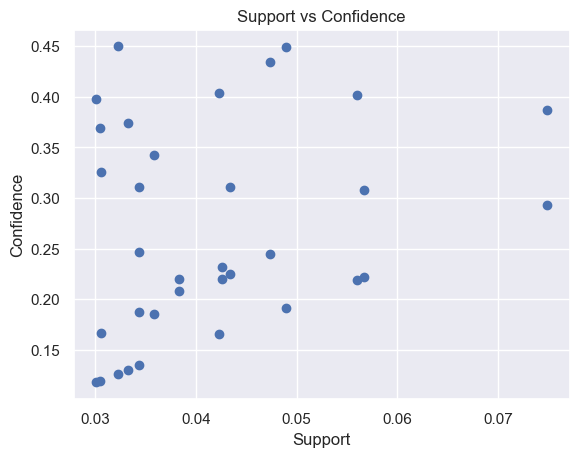

In [92]:
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

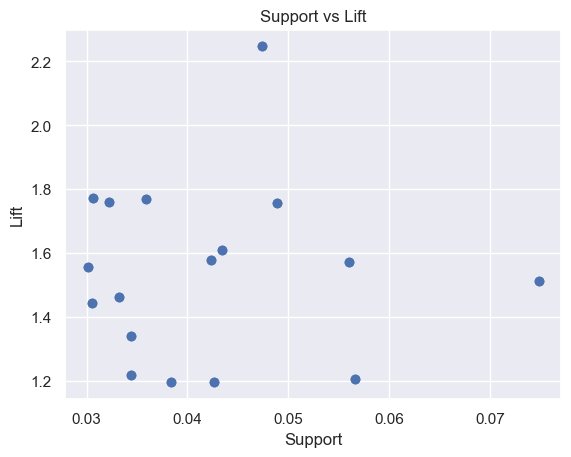

In [93]:
plt.scatter(rules['support'],rules['lift'])
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Support vs Lift')
plt.show()

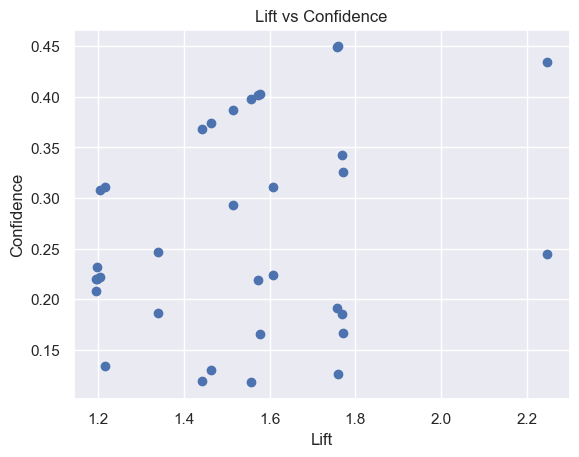

In [94]:
plt.scatter(rules['lift'],rules['confidence'])
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.title('Lift vs Confidence')
plt.show()

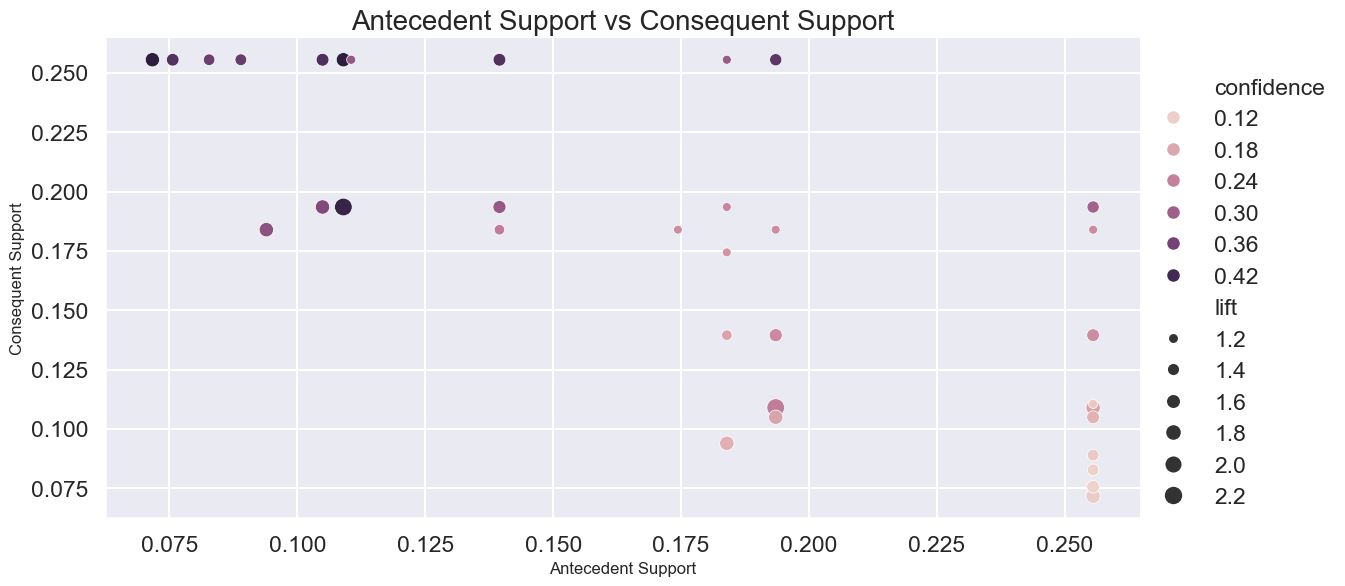

In [95]:
import seaborn as sns

sns.set_context("talk")
sns.relplot(x='antecedent support', y='consequent support', data=rules, 
            size='lift', hue='confidence', height=6, aspect=2)
plt.title("Antecedent Support vs Consequent Support", fontsize=20)
plt.xlabel('Antecedent Support', fontsize=12)
plt.ylabel('Consequent Support', fontsize=12)
plt.show()

In [96]:
frequent_items.sort_values(by = "support", ascending = False)
#whole milk has highest support, so create table with it as the antecedent, and use for analysis

,support,itemsets
42,0.255516,(whole milk)
26,0.193493,(other vegetables)
30,0.183935,(rolls/buns)
35,0.174377,(soda)
43,0.139502,(yogurt)
...,...,...
25,0.031012,(onions)
54,0.030605,"(rolls/buns, sausage)"
45,0.030503,"(citrus fruit, whole milk)"
36,0.030402,(specialty chocolate)


In [97]:
milk_rules=rules[rules["antecedents"].apply(lambda x: "whole milk" in x)]
milk_rules.sort_values('confidence', ascending=False)
#get every antecedent-consequent pair where whole milk is antecedent

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
10,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548,0.455803
23,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452,0.228543
33,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157,0.488608
27,(whole milk),(root vegetables),0.255516,0.108998,0.048907,0.191405,1.756031,0.021056,1.101913,0.578298
29,(whole milk),(tropical fruit),0.255516,0.104931,0.042298,0.165539,1.577595,0.015486,1.072631,0.491782
0,(whole milk),(bottled water),0.255516,0.110524,0.034367,0.134501,1.216940,0.006126,1.027703,0.239450
15,(whole milk),(pastry),0.255516,0.088968,0.033249,0.130123,1.462587,0.010516,1.047312,0.424831
31,(whole milk),(whipped/sour cream),0.255516,0.071683,0.032232,0.126144,1.759754,0.013916,1.062323,0.579917
3,(whole milk),(citrus fruit),0.255516,0.082766,0.030503,0.119379,1.442377,0.009355,1.041577,0.411963
16,(whole milk),(pip fruit),0.255516,0.075648,0.030097,0.117788,1.557043,0.010767,1.047765,0.480544


In [98]:
milk_rules['sum']=milk_rules['support']+milk_rules['confidence']+milk_rules['lift']+milk_rules['zhangs_metric']
milk_rules.sort_values('sum',inplace=True,ascending=False)
#sum the support, confidence, lift and zhang metric to find out the matches with highest importance
best_milk_rules=milk_rules.head(5)
best_milk_rules

C:\Users\gbpak\AppData\Local\Temp\ipykernel_19916\895288683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  milk_rules['sum']=milk_rules['support']+milk_rules['confidence']+milk_rules['lift']+milk_rules['zhangs_metric']
C:\Users\gbpak\AppData\Local\Temp\ipykernel_19916\895288683.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  milk_rules.sort_values('sum',inplace=True,ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,sum
27,(whole milk),(root vegetables),0.255516,0.108998,0.048907,0.191405,1.756031,0.021056,1.101913,0.578298,2.574641
31,(whole milk),(whipped/sour cream),0.255516,0.071683,0.032232,0.126144,1.759754,0.013916,1.062323,0.579917,2.498047
10,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548,0.455803,2.337149
33,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157,0.488608,2.335627
29,(whole milk),(tropical fruit),0.255516,0.104931,0.042298,0.165539,1.577595,0.015486,1.072631,0.491782,2.277214


In [99]:
rules_eda = rules.copy(deep=True)
rules_eda['antecedents'] = rules_eda['antecedents'].apply(lambda a: ', '.join(list(a))) #remove brackets
rules_eda['consequents'] = rules_eda['consequents'].apply(lambda a: ', '.join(list(a)))
rules_eda.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7,other vegetables,root vegetables,0.193493,0.108998,0.047382,0.244877,2.246605,0.026291,1.179941,0.688008
6,root vegetables,other vegetables,0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693,0.622764
19,sausage,rolls/buns,0.093950,0.183935,0.030605,0.325758,1.771048,0.013324,1.210344,0.480506
18,rolls/buns,sausage,0.183935,0.093950,0.030605,0.166390,1.771048,0.013324,1.086899,0.533490
8,tropical fruit,other vegetables,0.104931,0.193493,0.035892,0.342054,1.767790,0.015589,1.225796,0.485239


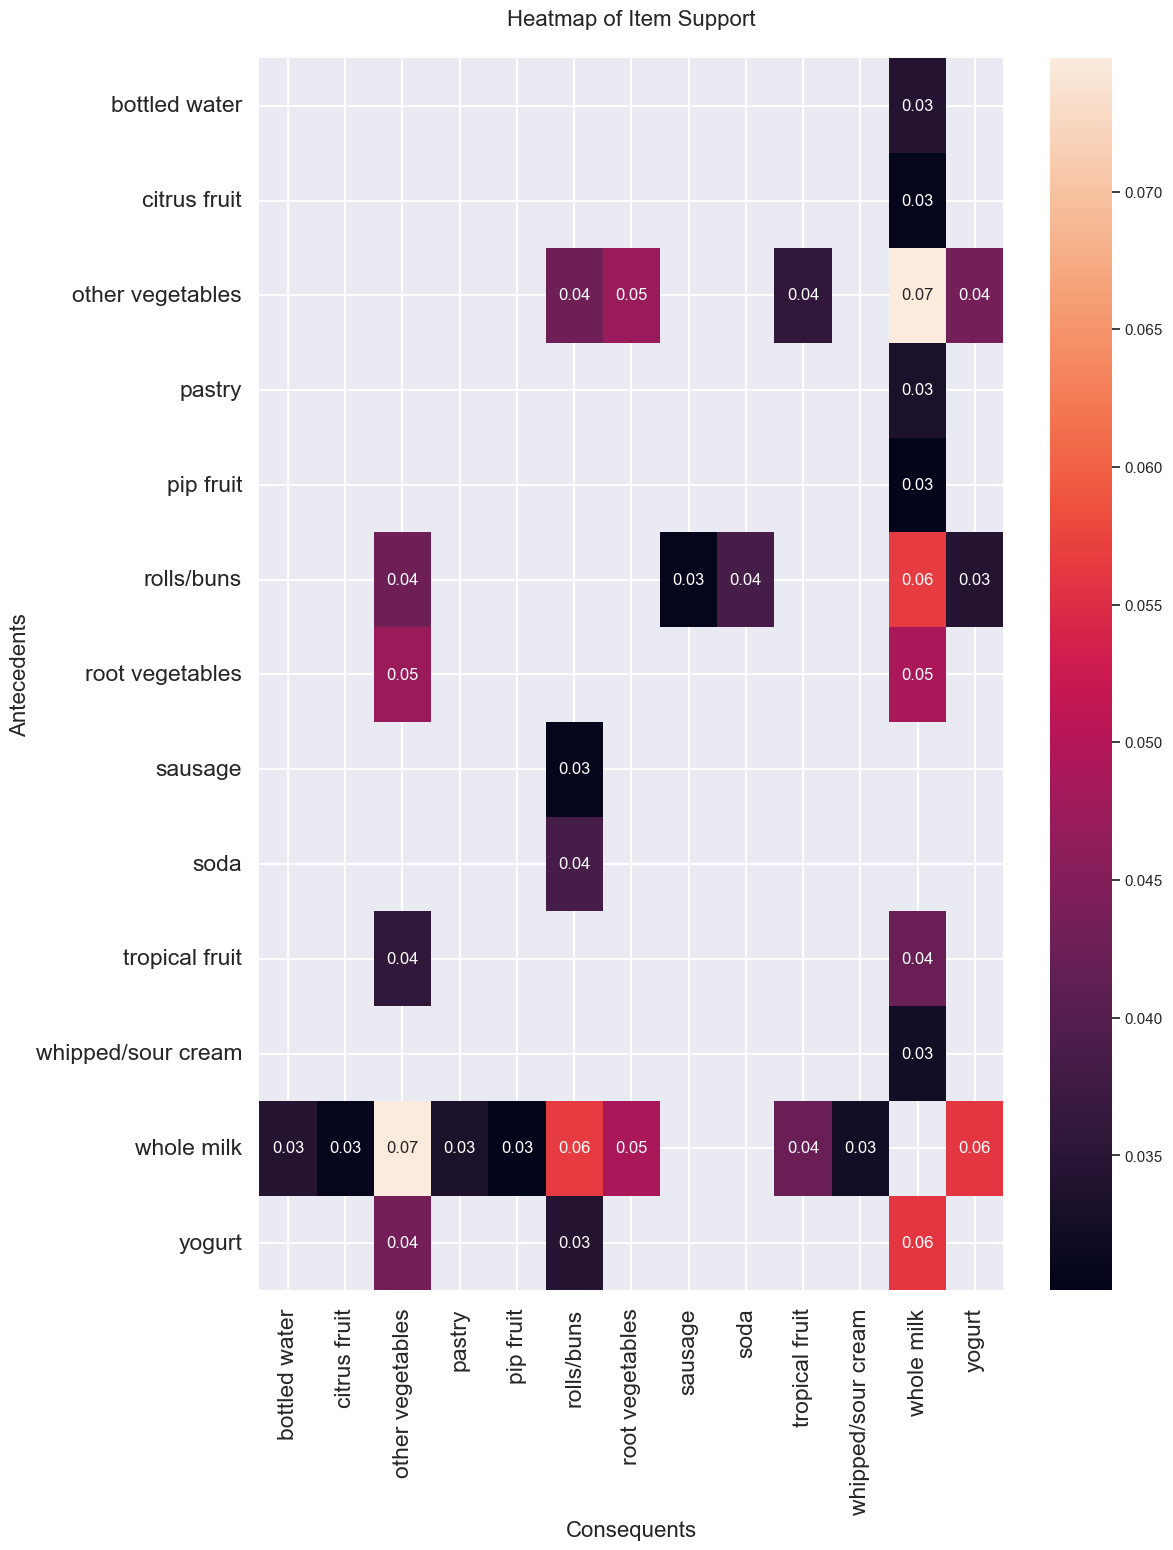

In [101]:
pivot = rules_eda.pivot(index='antecedents', columns='consequents', values='support')

sns.set_context("talk")
plt.subplots(figsize=(12, 16))
sns.set()
ax = sns.heatmap(data=pivot, annot=True, fmt='.2f', cbar=True)
plt.title("Heatmap of Item Support", fontsize=16, y=1.02)
ax.set_xlabel("Consequents",fontsize=16)
ax.set_ylabel("Antecedents",fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show() 